# Exercise 1
 <p><div class="lev1"><a href="#Task-A.-Another-LEGO-brick-in-the-wall"><span class="toc-item-num">Task A.&nbsp;&nbsp;</span>Another LEGO brick in the wall</a></div>
 <p><div class="lev1"><a href="#Task-B.-Drop-the-Bike"><span class="toc-item-num">Task B.&nbsp;&nbsp;</span>Drop the Bike</a></div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pl
import zipfile
import math
pd.options.mode.chained_assignment = None
# default='warn', Mutes warnings when copying a slice from a DataFrame.


In [2]:
DATA_FOLDER = 'data'

## Task A. Another LEGO brick in the wall

LEGO is a popular brand of toy building bricks. They are often sold in sets in order to build a specific object. Each set contains a number of parts in different shapes, sizes and colors. This database contains information on which parts are included in different LEGO sets. It was originally compiled to help people who owned some LEGO sets already figure out what other sets they could build with the pieces they had.

This dataset contains the official LEGO colors, parts, inventories (i.e., sets of LEGO parts which assembled create an object in the LEGO world) and sets (i.e., sets of LEGO inventories which assembled create a LEGO ecosystem). The schema of the dataset can be shown in the following UML diagram: 

![lego-schema](lego-schema.png)

In this task you have to apply the following Data Wrangling pipeline:
1. Load your data into `Pandas`
* Explore it and clean its dirty parts
* Use it to answer a set of queries

Each of these subtasks are described in detail below.

### A1. Loading phase
Load all the csv files into different `DataFrames`. Use meaningful names for your `DataFrames` (e.g., the respective filenames).

*Hint: You can load files without first unzipping them (for `Pandas` version >= 0.18.1).*

In [3]:
LEGO_DATA_FOLDER = DATA_FOLDER + '/lego'

In [4]:
# Write your code here
colors            = pd.read_csv("data/lego/colors.csv.zip")
inventories       = pd.read_csv("data/lego/inventories.csv.zip")
inventory_parts   = pd.read_csv("data/lego/inventory_parts.csv.zip")
inventory_sets    = pd.read_csv("data/lego/inventory_sets.csv.zip")
part_categories   = pd.read_csv("data/lego/part_categories.csv.zip")
parts             = pd.read_csv("data/lego/parts.csv.zip")
sets              = pd.read_csv(LEGO_DATA_FOLDER+"/sets.csv.zip")
themes            = pd.read_csv("data/lego/themes.csv.zip")

print(themes.head())
sets.head()

   id            name  parent_id
0   1         Technic        NaN
1   2  Arctic Technic        1.0
2   3     Competition        1.0
3   4  Expert Builder        1.0
4   5           Model        1.0


,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,70s,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


### A2. Cleaning phase
Explore the following columns from your dataset:

1. sets: year
* inventory_parts: quantity

What is the time range of the sets? 
What is the average quantity of the inventory parts? 
Do you see any inconsistencies? 
Provide code that detects and cleans such inconsistencies and validates the coherence of your dataset. 

*We see that in the column "year" of "sets", there are numbers written like "70s" or even with a minus (like "-2013", which of course are refered to:
70s -> 1970-80
-2013 -> 2013*

*For its part, in the column "quantify" of "inventory_parts" we find that there are many values -inf, what could means that there is no data about the quantity of these inventory parts.*


In [5]:
sets.head()

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,70s,414,471
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,2
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


In [6]:
(sets.loc[:, ['year']]).head()

,year
0,70s
1,1978
2,1987
3,1979
4,1979


In [7]:
sets.query('year == "70s"').head()

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,70s,414,471
241,102A-1,Front-End Loader,70s,416,64
242,102A-2,Front-End Loader,70s,416,56
252,104-1,Replacement 4.5V Motor,70s,243,1
724,126-1,Steam Locomotive (Push),70s,235,60


In [8]:
#sets.year.replace({"year < 0": "-year"}, inplace=True) #Replace the negative values with positives #NOOO
#sets=pd.read_csv(LEGO_DATA_FOLDER+"/sets.csv.zip", na_values=["sets.year>2019"])

In [9]:
sets.year.replace({'70s': 1975}, inplace=True) #Replace the year values "70s" with 1975

In [10]:
#sets.year.replace({'-': '+'}, inplace=True) #No vale
sets.year = sets.year.apply(pd.to_numeric, errors = 'coerce') #To converted string to numeric (to use abs())
sets['year'] = sets['year'].abs()

In [11]:
mask = sets.year > 2019
column_name = 'year'
sets.loc[mask, column_name] = np.nan

In [12]:
sets

,id,name,year,theme_id,num_parts
0,00-1,Weetabix Castle,1975.0,414,471
1,0011-2,Town Mini-Figures,1978.0,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987.0,199,2
3,0012-1,Space Mini-Figures,1979.0,143,12
4,0013-1,Space Mini-Figures,1979.0,143,12
5,0014-1,Space Mini-Figures,1979.0,143,12
6,0015-1,Space Mini-Figures,1979.0,143,18
7,0016-1,Castle Mini Figures,NaN,186,15
8,00-2,Weetabix Promotional House 1,1976.0,413,147
9,00-3,Weetabix Promotional House 2,1976.0,413,149


In [13]:
inventory_parts.head()

,inventory_id,part_id,color_id,quantity,is_spare
0,1,48379c01,72,1.0,f
1,1,48395,7,1.0,f
2,1,mcsport6,25,1.0,f
3,1,paddle,0,1.0,f
4,3,11816pr0005,78,1.0,f


In [14]:
inventory_parts=pd.read_csv(LEGO_DATA_FOLDER+"/inventory_parts.csv.zip", na_values=['-inf'])
inventory_parts.quantity.replace(np.nan, 0.0, inplace=True)

inventory_parts.head(10)

,inventory_id,part_id,color_id,quantity,is_spare
0,1,48379c01,72,1.0,f
1,1,48395,7,1.0,f
2,1,mcsport6,25,1.0,f
3,1,paddle,0,1.0,f
4,3,11816pr0005,78,1.0,f
5,3,2343,47,1.0,f
6,3,3003,29,1.0,f
7,3,30176,2,1.0,f
8,3,3020,15,1.0,f
9,3,3022,15,0.0,f


__\* Briefly explain your approach here \*__

### A3. Querying phase
Answer the following queries using the functionality of `Pandas`:

1. List the ids of the inventories that belong to sets that contain cars. (*Hint: Find a smart way to distinguish which sets contain cars based on the sets' name*).
* Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
* Find the dominant color of each set. Then, plot using a (horizontal) bar chart, the number of sets per dominant color. Color each bar with the respective color that it represents.
* Create a scatter plot of the *luminance*\* of the sets vs their publishing year. What do you observe for the years 1980-1981? How do you interpret what you see?

\*The luminance of a color is a [measure of brightness](https://en.wikipedia.org/wiki/Luminance) which, given its RGB representation, can be computed as follows:

$luminance = \sqrt{0.299*R^2 + 0.587*G^2 + 0.114*B^2}$

EXERCISE 1

27     10002-1
142    10158-1
154    10170-1
250     1038-1
325    10589-1
Name: id, dtype: object


EXERCISE 2

	20 largest part categories:

       part_id  quantity
492590    3024    1440.0
499547    3024    1170.0
576725    3024     900.0
576726    3024     900.0
576728    3024     900.0
576724    3024     900.0
576727    3024     900.0
17480     3024     810.0
305333    3023     771.0
260546    2780     724.0
274448    3024     720.0
492588    3024     630.0
390123   54200     556.0
17481     3024     540.0
274449    3024     540.0
274451    3024     540.0
371410    2780     516.0
49952     2357     509.0
202297    2780     495.0
114236    3004     460.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4B5815C18>]],
      dtype=object)

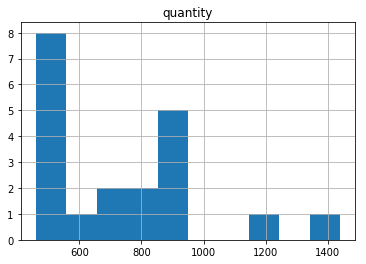

In [15]:
# Write your code here

#1-List the ids of the inventories that belong to sets that contain cars. 
#(Hint: Find a smart way to distinguish which sets contain cars based on the sets' name)
print("EXERCISE 1\n")
print(sets[[name.endswith('Car') for name in sets.name]].id.head())

#2-Plot the distribution of part categories as a (horizontal) bar chart. Restrict yourself to the 20 largest part categories (in terms of the number of parts belonging to the category).
print("\n\nEXERCISE 2\n")
print("\t20 largest part categories:\n")
distributionPC=inventory_parts[['part_id','quantity']].sort_values(ascending=[False], by=['quantity']).head(20)
#baseball[['player','sb','cs']].sort_values(ascending=[False,True], by=['sb', 'cs']).head(10)
print(distributionPC)
distributionPC.hist()


In [16]:
#3-Find the dominant color of each set. Then, plot using a (horizontal) bar chart, 
#the number of sets per dominant color. Color each bar with the respective color that it represents.
#print("\n\nEXERCISE 3\n")
#print("part_categories\n")
#print(part_categories.head())
#print("inventory_parts\n")
#print(inventory_parts.head())
#inventories.head()
#colors.head()
#part_categories.head()
#sets.head()
#themes.head()
#parts.head()
#inventory_sets.head()
df1=inventory_sets[["set_id", "inventory_id"]]
df2=inventory_parts[["inventory_id","color_id", "quantity"]]
df3=colors[["id", "name"]]
df4=sets[["id","name"]]

dftemp=pd.merge(df1,df2)
dftemp=pd.merge(df3, dftemp, left_on='id',right_on='color_id')[["set_id","name", "quantity"]]
dfFinal=pd.merge(df4, dftemp, left_on='id',right_on='set_id')
dfFinal

,id,name_x,set_id,name_y,quantity
0,10127-1,NHL Action Set with Stickers,10127-1,Black,0.0
1,10127-1,NHL Action Set with Stickers,10127-1,Blue,0.0
2,10127-1,NHL Action Set with Stickers,10127-1,Green,0.0
3,10127-1,NHL Action Set with Stickers,10127-1,Red,0.0
4,10127-1,NHL Action Set with Stickers,10127-1,White,0.0
5,10127-1,NHL Action Set with Stickers,10127-1,White,0.0
6,10127-1,NHL Action Set with Stickers,10127-1,Orange,0.0
7,10127-1,NHL Action Set with Stickers,10127-1,[No Color],0.0
8,10127-1,NHL Action Set with Stickers,10127-1,[No Color],1.0
9,10127-1,NHL Action Set with Stickers,10127-1,[No Color],0.0


In [17]:
dfFinal=dfFinal[["id","name_x","name_y", "quantity"]]
dfFinal.head()

,id,name_x,name_y,quantity
0,10127-1,NHL Action Set with Stickers,Black,0.0
1,10127-1,NHL Action Set with Stickers,Blue,0.0
2,10127-1,NHL Action Set with Stickers,Green,0.0
3,10127-1,NHL Action Set with Stickers,Red,0.0
4,10127-1,NHL Action Set with Stickers,White,0.0


In [18]:
#dfFinal
#for i in sets.id:
 #   dfFinal.loc[i]
#segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False).head(30)
dfFinal.groupby(["id","name_y"]).quantity.sum().sort_values(ascending=False, inplace=False)

id       name_y          
pk1062   White               62.0
1064-1   White               62.0
1062-1   White               62.0
k1062b   White               62.0
4548-1   Dark Bluish Gray    16.0
10173-1  Dark Bluish Gray    16.0
k1062b   Green               13.0
1064-1   Green               13.0
pk1062   Green               13.0
1062-1   Green               13.0
1064-1   Light Gray          12.0
1062-1   Light Gray          12.0
         Black               12.0
k1062b   Black               12.0
1064-1   Black               12.0
k1062b   Light Gray          12.0
pk1062   Light Gray          12.0
         Black               12.0
9767-1   [No Color]           9.0
9750-1   [No Color]           9.0
9700-1   [No Color]           9.0
1062-1   Trans-Yellow         8.0
pk1062   Trans-Green          8.0
1064-1   Trans-Yellow         8.0
         Trans-Red            8.0
         Trans-Green          8.0
pk1062   Trans-Yellow         8.0
         Trans-Red            8.0
1062-1   Trans-Red    

In [19]:
#dfFinal.name_x.value_counts()

In [20]:
#dfFinal
#for i in sets.id:
 #   dfFinal.loc[i]
#segments.groupby(segments.name).seg_length.sum().sort_values(ascending=False, inplace=False).head(30)
t=dfFinal.groupby(["id","name_x","name_y"]).quantity.sum() #.sort_values(ascending=False, inplace=True)
t.sort_values(ascending=False, inplace=True)
#t = t.set_index(['id','name_y'])
#t['pk1062'][t['pk1062'] == 62.0].index[0]
t=t.to_frame().reset_index()
t=t.drop_duplicates(subset="id")
t.id.is_unique
t[["name_x","name_y"]]

,name_x,name_y
0,Lego Road Safety Kit Poster,White
1,Dacta Buildings,White
2,{Town Vehicles},White
3,Set K1062 Activity Booklet,White
4,Transformer and Speed Regulator,Dark Bluish Gray
5,Holiday Train,Dark Bluish Gray
18,Interface Card/Cable for Apple IIe and IIGS,[No Color]
19,LEGO Interface,[No Color]
20,Technic Control Center,[No Color]
35,Reidak,Black


In [21]:
for name_x, group in dfgrouped:
    print('\nSetName:', name_x)
    print('group', group)

NameError: name 'dfgrouped' is not defined

__\* Briefly explain your approach for every query here \*__

## Task B. Drop the bike

*Los Angeles Metro* has been sharing publicly [anonymized *Metro Bike Share* trip data](https://bikeshare.metro.net/about/data/) under the [Open Database License (ODbL)](http://opendatacommons.org/licenses/odbl/1.0/).

In this task you will again perform data wrangling and interpretation.

### B1. Loading phase
Load the json file into a `DataFrame`.


In [22]:
BIKES_DATA_FOLDER = DATA_FOLDER + '/bikes'

In [23]:
data_df = pd.read_json(BIKES_DATA_FOLDER + "/metro-bike-share-trip-data.json.zip")
data_df.head(2)

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180,2016-07-07T04:20:00,3014.0,34.05661,-118.23721,Monthly Pass,30.0,2016-07-07T04:17:00,3014.0,34.05661,-118.23721,1912818,Round Trip
1,6281.0,1980,2016-07-07T06:33:00,3014.0,34.05661,-118.23721,Monthly Pass,30.0,2016-07-07T06:00:00,3014.0,34.05661,-118.23721,1919661,Round Trip


### B2. Cleaning phase
Describe the type and the value range of each attribute. Indicate and transform the attributes that are `Categorical`. Are there redundant columns in the dataset (i.e., are there columns whose value depends only on the value of another column)? What are the possible pitfalls of having such columns? Reduce *data redundancy* by extracting such columns to separate `DataFrames`. Which of the two formats (the initial one or the one with reduced data redundancy) is more susceptible to inconsistencies? At the end print for each `Dataframe` the *type of each column* and it's *shape*.

First we set the Trip ID field as index and check succesfully wether it is unique

In [24]:
data_df.set_index("Trip ID")
data_df.index.is_unique

True

Data types:

In [25]:
data_df.dtypes

Bike ID                       float64
Duration                        int64
End Time                       object
Ending Station ID             float64
Ending Station Latitude       float64
Ending Station Longitude      float64
Passholder Type                object
Plan Duration                 float64
Start Time                     object
Starting Station ID           float64
Starting Station Latitude     float64
Starting Station Longitude    float64
Trip ID                         int64
Trip Route Category            object
dtype: object

Before showing the quering phase, we transform "End Time" and "Start Time" to datetime type(from the original format) in order to work easily with these data. Some values in the "Duration" column are unexpectedly large, so we can recomputed from "Start Time" and "End Time" columns, we can do so to anticipate errors in the dataset.

In [26]:
from datetime import date, time, datetime
from dateutil.parser import parse

data_df["End Time"]   = data_df["End Time"].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))
data_df["Start Time"] = data_df["Start Time"].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))
data_df["Duration"]   = pd.to_datetime(data_df["End Time"])-pd.to_datetime(data_df["Start Time"])
data_df["Duration"]   = data_df["Duration"].apply(lambda x: x.total_seconds())
data_df.head(2)

,Bike ID,Duration,End Time,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Passholder Type,Plan Duration,Start Time,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID,Trip Route Category
0,6281.0,180.0,2016-07-07 04:20:00,3014.0,34.05661,-118.23721,Monthly Pass,30.0,2016-07-07 04:17:00,3014.0,34.05661,-118.23721,1912818,Round Trip
1,6281.0,1980.0,2016-07-07 06:33:00,3014.0,34.05661,-118.23721,Monthly Pass,30.0,2016-07-07 06:00:00,3014.0,34.05661,-118.23721,1919661,Round Trip


Value range of "End Time" and "Start Time"

In [27]:
print("Min Start Time", data_df.sort_values("Start Time")["Start Time"].iloc[0])
print("Max Start Time", data_df.sort_values("Start Time")["Start Time"].iloc[-1])
print("Min End Time", data_df.sort_values("Start Time")["End Time"].iloc[0])
print("Max End Time", data_df.sort_values("Start Time")["End Time"].iloc[-1])

Min Start Time 2016-07-07 04:17:00
Max Start Time 2017-03-31 23:45:00
Min End Time 2016-07-07 04:20:00
Max End Time 2017-04-01 00:06:00


Value range of the rest of the noncategorical data:

In [28]:
data_df.describe().loc[["min","max"]]

,Bike ID,Duration,Ending Station ID,Ending Station Latitude,Ending Station Longitude,Plan Duration,Starting Station ID,Starting Station Latitude,Starting Station Longitude,Trip ID
min,1349.0,60.0,3000.0,0.000000,-118.472832,0.0,3000.0,0.000000,-118.472832,1912818.0
max,6728.0,491280.0,4108.0,34.064281,0.000000,365.0,4108.0,34.064281,0.000000,23794218.0


We found two explicitly categorical columns of data (Trip Route Category, Passholder Type), below we transform these attributes and show the categories they include:

In [29]:
print(pd.Categorical(data_df["Trip Route Category"]))
print(pd.Categorical(data_df["Passholder Type"]))
data_df["Trip Route Category"]=pd.Categorical(data_df["Trip Route Category"])
data_df["Passholder Type"]=pd.Categorical(data_df["Passholder Type"])

[Round Trip, Round Trip, Round Trip, Round Trip, Round Trip, ..., One Way, One Way, One Way, One Way, One Way]
Length: 132427
Categories (2, object): [One Way, Round Trip]
[Monthly Pass, Monthly Pass, Flex Pass, Flex Pass, Walk-up, ..., Walk-up, Walk-up, Walk-up, Walk-up, Walk-up]
Length: 132427
Categories (4, object): [Flex Pass, Monthly Pass, Staff Annual, Walk-up]


We notice the following redundancies in our dataframe:

 - Duration could be redundant because we can get it from Start and End time data (to do another data frame with that seems to be more redundant)
 
 - With "Trip Route Category"  we have a similar problem (its value is "Round Trip" if Starting and Endind stations are the same, "One Way" otherwise)
 
 - Below we create new DFs for Station Localitations(with Station ID, Latitude and Longitude) and for Passholder-Plan Duration. Obviously the Latitude and Longitude depends on the Station and we have also seen that the Plan duration depends on the Passholder type.
 
 - After creating the last two DFs(data frames), we transform the original DF deleting the redundant information that we keep in the others DFs.

The original format seems to be more susceptible to inconsistencies because if we want to change one value in a row, we would need to change every related values in every row (in order to have no inconsistencies).

In [30]:
df_passholder = pd.DataFrame([{'Passholder Type':"Flex Pass", "Plan Duration":365.0},
                            {'Passholder Type':"Monthly Pass", "Plan Duration":30.0},
                            {'Passholder Type':"Staff Pass", "Plan Duration":365.0},
                            {'Passholder Type':"Walk-up", "Plan Duration":0.0}])

In [31]:
df_station1=data_df[["Starting Station ID", "Starting Station Latitude", "Starting Station Longitude"]]
df_station1.columns=["Station ID", "Station Latitude", "Station Longitude"]

df_station2=data_df[["Ending Station ID", "Ending Station Latitude", "Ending Station Longitude"]]
df_station2.columns=["Station ID", "Station Latitude", "Station Longitude"]

df_station=pd.concat([df_station1,df_station2], axis=0)
df_station.drop_duplicates(["Station ID"], inplace=True)
df_station.reset_index(drop=True)

df_station.dropna(how="all") #In order to delete rows with all NaN values
df_station.head()

,Station ID,Station Latitude,Station Longitude
0,3014.0,34.056610,-118.23721
2,3016.0,34.052898,-118.24156
4,3032.0,34.049889,-118.25588
5,3021.0,34.045609,-118.23703
6,3022.0,34.046070,-118.23309


In [32]:
#We transform the original DF deleting the redundant information that we keep in the others DFs.
data_df=data_df[["Bike ID", "Duration", "End Time", "Ending Station ID",
                 "Passholder Type","Start Time", "Starting Station ID","Trip ID", "Trip Route Category"]]

In [33]:
#At the end print for each Dataframe the type of each column and it's shape.
print("TRANSFORMED data frame\n",data_df.dtypes)
print("\nShape:",data_df.shape[0])

print("\ndf_passholder data frame\n",df_passholder.dtypes)
print("\nShape:",df_passholder.shape[0])

print("\ndf_station data frame\n",df_station.dtypes)
print("\nShape:",df_station.shape[0])

TRANSFORMED data frame
 Bike ID                       float64
Duration                      float64
End Time               datetime64[ns]
Ending Station ID             float64
Passholder Type              category
Start Time             datetime64[ns]
Starting Station ID           float64
Trip ID                         int64
Trip Route Category          category
dtype: object

Shape: 132427

df_passholder data frame
 Passholder Type     object
Plan Duration      float64
dtype: object

Shape: 4

df_station data frame
 Station ID           float64
Station Latitude     float64
Station Longitude    float64
dtype: object

Shape: 68


### B3. Querying phase
Answer the following queries using the functionality of `Pandas`.

**1. Plot the *distribution* of the number of outgoing trips from each station in a histogram with 20 bins (Hint: each bin describes a range of counts, not stations**


In [34]:
data_df["Starting Station ID"].value_counts().head()

3069.0    5138
3030.0    5059
3005.0    4883
3064.0    4661
3031.0    4629
Name: Starting Station ID, dtype: int64

Text(0.5,0.98,'Sample Title')

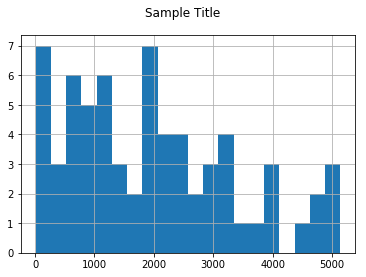

In [35]:
h = data_df["Starting Station ID"].value_counts().hist(bins=20)
pl.suptitle("Sample Title")

**2.- Plot histograms for the *duration* and *trip starting hour in the day* attributes. For both the *duration*  and the *trip starting hour* use *discrete 1-hour intervals*. What do you observe in each plot? What are some popular values in the *duration* plot? Explain the local maxima and the trends you observe on the *trip starting hour* plot based on human behavior.**

In [36]:
data_df["Duration"] = data_df["Duration"]/3600.0   #Convert to hours
print(data_df.Duration.describe())

count    132427.000000
mean          0.469812
std           2.402037
min           0.016667
25%           0.100000
50%           0.166667
75%           0.300000
max         136.466667
Name: Duration, dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4B4264550>]],
      dtype=object)

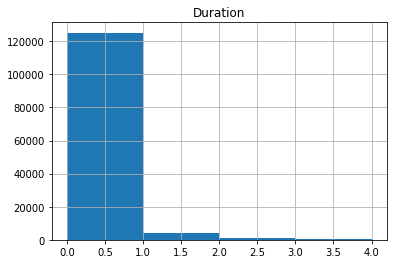

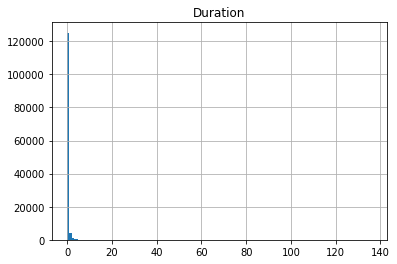

In [37]:
pd.DataFrame.hist(data_df,column="Duration", bins=range(0,5))
pd.DataFrame.hist(data_df,column="Duration", bins=range(0,137))

Text(0,0.5,'Number of travels')

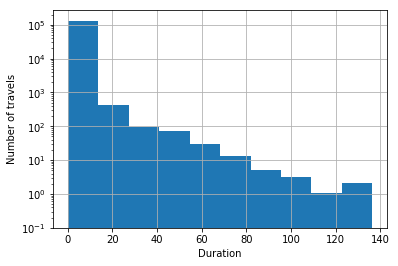

In [38]:
fig, ax = plt.subplots()
data_df["Duration"].hist(ax=ax, bottom=0.1)
ax.set_yscale('log')
ax.set_xlabel('Duration')
ax.set_ylabel('Number of travels')

The asked plot is the second one. We observe that almost all the trips have a duration of less than an hour (this is why we have plotted the first diagram, for seeing this fact clearly). 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4B4116F98>]],
      dtype=object)

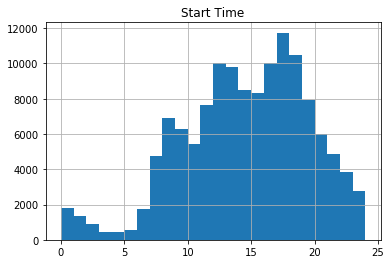

In [39]:
df_tmp=data_df["Start Time"].apply(lambda x: x.hour)  #the values are now discretized

pd.DataFrame.hist(df_tmp.to_frame(),column="Start Time", bins=range(0,25))

First, we find that the time interval with more departures is from 7 to 22; this seems to be clearly because  from 22 to 7 people are sleeping. 

Secondly, we observe the maximal activity at around 17; this could be(possibly) because a lot of people finish their workday at this time.

**3.- For each *trip route category*, calculate the proportion of trips by *passholder type* and present your results in *a stacked bar chart with normalized height*.**

In [40]:
#3
df_tmp=(data_df[data_df["Trip Route Category"]=="One Way"])
total_One_Way_trips=len(df_tmp)
staff_trips=len(df_tmp[df_tmp["Passholder Type"]=="Staff Annual"])
monthly_pass_trips=len(df_tmp[df_tmp["Passholder Type"]=="Monthly Pass"])
flex_pass_trips=len(df_tmp[df_tmp["Passholder Type"]=="Flex Pass"])
walk_up_trips=len(df_tmp[df_tmp["Passholder Type"]=="Walk-up"])

prop_staff=staff_trips/total_One_Way_trips
prop_monthly=monthly_pass_trips/total_One_Way_trips
prop_flex=flex_pass_trips/total_One_Way_trips
prop_walk_up=walk_up_trips/total_One_Way_trips

print("For \"One Way\" category:")
print("Prop. of \"Staff Annual\" =",prop_staff)
print("Prop. of \"Monthly pass\" =", prop_monthly)
print("Prop. of \"Flex Pass\" =",prop_flex)
print("Prop. \"Walk-up\" =",prop_walk_up)
print("Sum = ",prop_staff + prop_monthly + prop_flex + prop_walk_up) #must add up to 100

For "One Way" category:
Prop. of "Staff Annual" = 0.0024991223817722873
Prop. of "Monthly pass" = 0.6480332993430401
Prop. of "Flex Pass" = 0.07550860065863159
Prop. "Walk-up" = 0.2739589776165561
Sum =  1.0


In [41]:
df_tmp=(data_df[data_df["Trip Route Category"]=="Round Trip"])
total_Round_Trip_trips=len(df_tmp)
staff_trips=len(df_tmp[df_tmp["Passholder Type"]=="Staff Annual"])
monthly_pass_trips=len(df_tmp[df_tmp["Passholder Type"]=="Monthly Pass"])
flex_pass_trips=len(df_tmp[df_tmp["Passholder Type"]=="Flex Pass"])
walk_up_trips=len(df_tmp[df_tmp["Passholder Type"]=="Walk-up"])

prop_staff2   = staff_trips/total_Round_Trip_trips
prop_monthly2 = monthly_pass_trips/total_Round_Trip_trips
prop_flex2    = flex_pass_trips/total_Round_Trip_trips
prop_walk_up2 = walk_up_trips/total_Round_Trip_trips

print("For \"Round Trip\" category:")
print("Prop. of \"Staff Annual\" =",prop_staff2)
print("Prop. of \"Monthly pass\" =", prop_monthly2)
print("Prop. of \"Flex Pass\" =",prop_flex2)
print("Prop. \"Walk-up\" =",prop_walk_up2)
print("Sum = ",prop_staff2 + prop_monthly2 + prop_flex2 + prop_walk_up2) #must add up to 100

For "Round Trip" category:
Prop. of "Staff Annual" = 0.0064919827923347675
Prop. of "Monthly pass" = 0.29503324208056314
Prop. of "Flex Pass" = 0.03777864685177943
Prop. "Walk-up" = 0.6606961282753226
Sum =  1.0


Text(0,0.5,'Proportion')

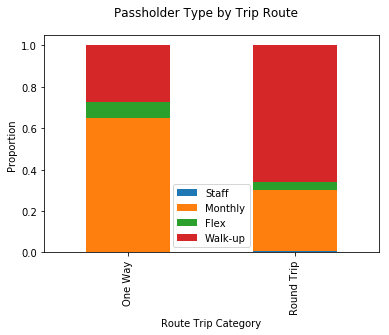

In [42]:
my_data = np.array([[prop_staff ,  prop_monthly,  prop_flex, prop_walk_up],
                    [prop_staff2,  prop_monthly2,  prop_flex2, prop_walk_up2]])

pd.DataFrame(my_data, index=["One Way","Round Trip"]).plot(kind='bar', stacked=True)
pl.suptitle("Passholder Type by Trip Route")
pl.legend(["Staff", "Monthly", "Flex", "Walk-up"])
pl.xlabel("Route Trip Category")
pl.ylabel("Proportion")

**4.- Considering only trips that begin in the morning hours (before noon), plot in *a single bar chart* the proportion of trips by *passholder type* and *trip route category*. Explain any outliers you observe.**

In [43]:
#We consider hours from 5 to 12 (the morning hours).
df_tmp=data_df[data_df["Start Time"].apply(lambda x: x.hour < 12 and x.hour>5)]
df_tmp

,Bike ID,Duration,End Time,Ending Station ID,Passholder Type,Start Time,Starting Station ID,Trip ID,Trip Route Category
1,6281.0,0.550000,2016-07-07 06:33:00,3014.0,Monthly Pass,2016-07-07 06:00:00,3014.0,1919661,Round Trip
2,5861.0,0.083333,2016-07-07 10:37:00,3016.0,Flex Pass,2016-07-07 10:32:00,3016.0,1933383,Round Trip
3,5861.0,3.016667,2016-07-07 13:38:00,3016.0,Flex Pass,2016-07-07 10:37:00,3016.0,1944197,Round Trip
199,5916.0,0.133333,2016-07-08 07:01:00,3030.0,Monthly Pass,2016-07-08 06:53:00,3049.0,2015755,One Way
200,5755.0,0.133333,2016-07-08 07:28:00,3021.0,Flex Pass,2016-07-08 07:20:00,3021.0,2015754,Round Trip
201,6141.0,0.233333,2016-07-08 07:50:00,3075.0,Monthly Pass,2016-07-08 07:36:00,3022.0,2015753,One Way
202,6031.0,0.033333,2016-07-08 07:45:00,3056.0,Monthly Pass,2016-07-08 07:43:00,3034.0,2015752,One Way
203,6440.0,0.150000,2016-07-08 08:06:00,3052.0,Monthly Pass,2016-07-08 07:57:00,3049.0,2019548,One Way
204,6267.0,0.133333,2016-07-08 08:05:00,3063.0,Flex Pass,2016-07-08 07:57:00,3018.0,2019547,One Way
205,6141.0,2.966667,2016-07-08 11:03:00,3035.0,Flex Pass,2016-07-08 08:05:00,3075.0,2031376,One Way


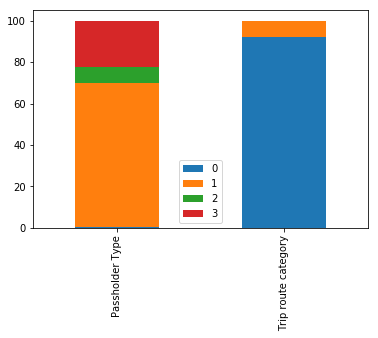

In [44]:
total_trips=len(df_tmp)
prop_staff=100*len(df_tmp[df_tmp["Passholder Type"]=="Staff Annual"])/total_trips
prop_monthly=100*len(df_tmp[df_tmp["Passholder Type"]=="Monthly Pass"])/total_trips
prop_flex=100*len(df_tmp[df_tmp["Passholder Type"]=="Flex Pass"])/total_trips
prop_walk_up=100*len(df_tmp[df_tmp["Passholder Type"]=="Walk-up"])/total_trips

prop_one_way=100*len(df_tmp[df_tmp["Trip Route Category"]=="One Way"])/total_trips
prop_round_trip=100*len(df_tmp[df_tmp["Trip Route Category"]=="Round Trip"])/total_trips

my_data = np.array([[prop_staff ,  prop_monthly,  prop_flex, prop_walk_up], [prop_one_way,  prop_round_trip,0,0]])
pd.DataFrame(my_data, index=["Passholder Type", "Trip route category"]).plot(kind='bar', stacked=True)

We observe in the **first chart** that during these hours the majority of the travellers have a "Monthly Pass"(orange portion) and also that there are so few travellers with the "Staff Annual"(blue portion). <br>In the **second chart** we see that the overwhelming majority of the travellers do a "One Way" trip.

**5.- Separate the hours of the day into two intervals that have (approximately) the same number of bikes leaving the stations. For each of the two intervals calculate the proportion of trips by *passholder type* and *trip route category*. Present your results in a `DataFrame` which has a unique, non-composite index. Does the proportion of trips depend on whether it is the first or second hour interval? Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.**

Firstly, we have to find the two hours intervals that have(approximately) the same number of departures.
For doing that, we create a temporal data frame and change the "Start Time" column for getting just the hours data. Then, we sort the data frame by the "Start Time" and finally we divide the data frame in two parts. 

We see that the last trip have the "Starting Time" 14, so we decide to take the intervals: Period1 = [0,14] and Period2 = [15,23]

In [45]:
df_tmp=data_df.copy()
df_tmp["Start Time"]=df_tmp["Start Time"].apply(lambda x: x.hour)

df_tmp.sort_values(ascending=True, by="Start Time", inplace=True)
df_tmp[:math.floor(len(df_tmp)/2)]

,Bike ID,Duration,End Time,Ending Station ID,Passholder Type,Start Time,Starting Station ID,Trip ID,Trip Route Category
71037,6536.0,0.183333,2016-10-27 00:57:00,3051.0,Monthly Pass,0,3014.0,11440222,One Way
77571,6055.0,0.083333,2016-11-08 00:59:00,3029.0,Walk-up,0,3082.0,12696443,One Way
77570,6664.0,0.233333,2016-11-08 00:57:00,3075.0,Monthly Pass,0,3022.0,12696444,One Way
77569,5986.0,0.150000,2016-11-08 00:49:00,3082.0,Monthly Pass,0,3063.0,12696445,One Way
77568,6061.0,0.066667,2016-11-08 00:33:00,3027.0,Monthly Pass,0,3023.0,12696446,One Way
77567,5872.0,0.066667,2016-11-08 00:32:00,3027.0,Monthly Pass,0,3023.0,12696447,One Way
77060,6446.0,0.150000,2016-11-07 00:55:00,3031.0,Monthly Pass,0,3014.0,12581808,One Way
77059,6634.0,0.433333,2016-11-07 00:54:00,3082.0,Monthly Pass,0,3082.0,12581809,Round Trip
77058,6066.0,0.150000,2016-11-07 00:34:00,3082.0,Walk-up,0,3069.0,12581810,One Way
77057,6253.0,0.150000,2016-11-07 00:13:00,3026.0,Monthly Pass,0,3065.0,12581811,One Way


Now, we calculate the proportion of trips by *passholder type* and *trip route category* for each of the two intervals and present our results in a `DataFrame`

In [46]:
#we observed that slicing the day in two intervals Period1 = [0,14] and Period2 = [15,23] 
#we get around the same number of bikes leaving the stations in each period
df_p1 = df_tmp[df_tmp["Start Time"].apply(lambda d: d < 15)]
df_p2 = df_tmp[df_tmp["Start Time"].apply(lambda d: d >= 15)]

#Proportions computation:
total_trips1  = len(df_p1)
prop_staff1   = len(df_p1[df_p1["Passholder Type"]=="Staff Annual"])/total_trips1
prop_monthly1 = len(df_p1[df_p1["Passholder Type"]=="Monthly Pass"])/total_trips1
prop_flex1    = len(df_p1[df_p1["Passholder Type"]=="Flex Pass"])/total_trips1
prop_walk_up1 = len(df_p1[df_p1["Passholder Type"]=="Walk-up"])/total_trips1

prop_one_way1    = len(df_p1[df_p1["Trip Route Category"]=="One Way"])/total_trips1
prop_round_trip1 = len(df_p1[df_p1["Trip Route Category"]=="Round Trip"])/total_trips1

total_trips2  = len(df_p2)
prop_staff2   = len(df_p2[df_p2["Passholder Type"]=="Staff Annual"])/total_trips2
prop_monthly2 = len(df_p2[df_p2["Passholder Type"]=="Monthly Pass"])/total_trips2
prop_flex2    = len(df_p2[df_p2["Passholder Type"]=="Flex Pass"])/total_trips2
prop_walk_up2 = len(df_p2[df_p2["Passholder Type"]=="Walk-up"])/total_trips2

prop_one_way2=len(df_p2[df_p2["Trip Route Category"]=="One Way"])/total_trips2
prop_round_trip2=len(df_p2[df_p2["Trip Route Category"]=="Round Trip"])/total_trips2

df_prop1=pd.DataFrame([{'Period':1, 'Passholder Type':"Flex Pass","PT Market Share":prop_flex1 },
                    {'Period':1,'Passholder Type':"Monthly Pass", "PT Market Share":prop_monthly1 },
                    {'Period':1,'Passholder Type':"Staff Pass", "PT Market Share":prop_staff1},
                    {'Period':1,'Passholder Type':"Walk-up", "PT Market Share":prop_walk_up1},
                    {'Period':2, 'Passholder Type':"Flex Pass","PT Market Share":prop_flex2 },
                    {'Period':2,'Passholder Type':"Monthly Pass", "PT Market Share":prop_monthly2 },
                    {'Period':2,'Passholder Type':"Staff Pass", "PT Market Share":prop_staff2},
                    {'Period':2,'Passholder Type':"Walk-up", "PT Market Share":prop_walk_up2}])

df_prop2=pd.DataFrame([{'Period':1, 'Trip Route Category':"One Way","TRC Market Share":prop_one_way1 },
                    {'Period':1,'Trip Route Category':"Round Trip", "TRC Market Share":prop_round_trip1 },
                    {'Period':2, 'Trip Route Category':"One Way","TRC Market Share":prop_one_way2 },
                    {'Period':2,'Trip Route Category':"Round Trip", "TRC Market Share":prop_round_trip2 },])

df_prop=pd.merge(df_prop1,df_prop2) #We are asked to give a DataFrame

df_prop

,PT Market Share,Passholder Type,Period,TRC Market Share,Trip Route Category
0,0.073514,Flex Pass,1,0.901018,One Way
1,0.073514,Flex Pass,1,0.098982,Round Trip
2,0.623208,Monthly Pass,1,0.901018,One Way
3,0.623208,Monthly Pass,1,0.098982,Round Trip
4,0.003640,Staff Pass,1,0.901018,One Way
5,0.003640,Staff Pass,1,0.098982,Round Trip
6,0.299637,Walk-up,1,0.901018,One Way
7,0.299637,Walk-up,1,0.098982,Round Trip
8,0.070205,Flex Pass,2,0.905914,One Way
9,0.070205,Flex Pass,2,0.094086,Round Trip


**Does the proportion of trips depend on whether it is the first or second hour interval? **
<br>The proportion is always similar (independently of the period)


**Would the company have any significant benefit by creating a more complex paying scheme where monthly pass users would pay less in the first interval and (equally) more on the second one? Assume that the number of trips per interval will not change if the scheme changes.**
<br>If monthly pass users pay less in the first interval, the company would earn less money because the market share in the first period is greater(for this kind of users).